# Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

C:\Users\ifeol\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Data Preparation

In [2]:
churn = pd.read_csv('churn.csv')

In [3]:
churn.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


In [5]:
churn.shape

(3333, 11)

In [6]:
churn.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [7]:
#checking for missing values in the dataset
churn.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [8]:
churn['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

# Data visualization

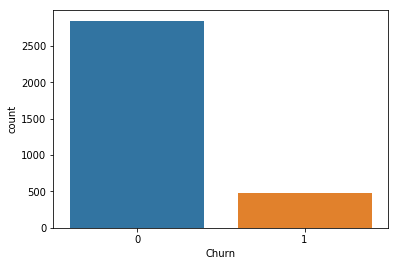

In [9]:
sns.countplot(churn['Churn'])

C:\Users\ifeol\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


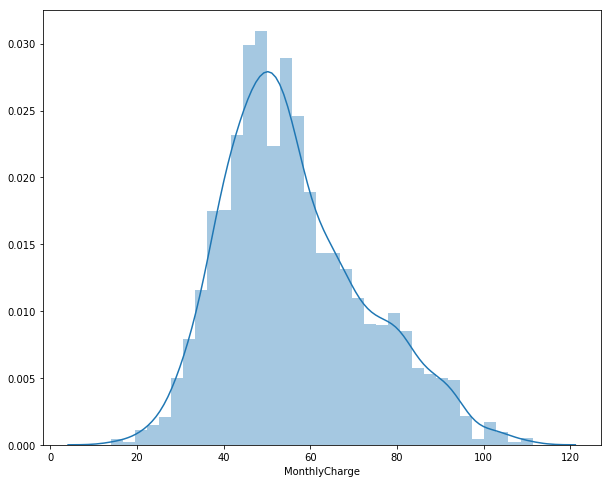

In [10]:
plt.figure(figsize=(10, 8))
sns.distplot(churn["MonthlyCharge"])

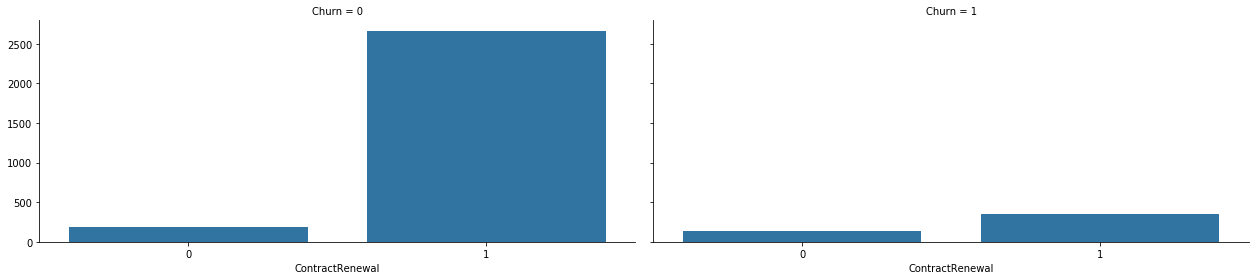

In [11]:
a = sns.FacetGrid(churn, col='Churn', size=4, aspect=2.2)
a = a.map(sns.countplot, 'ContractRenewal' )

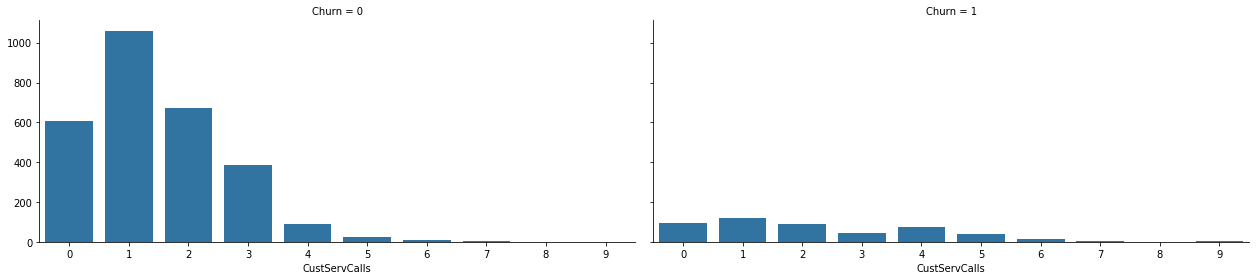

In [12]:
a = sns.FacetGrid(churn, col='Churn', size=4, aspect=2.2)
a = a.map(sns.countplot, 'CustServCalls' )

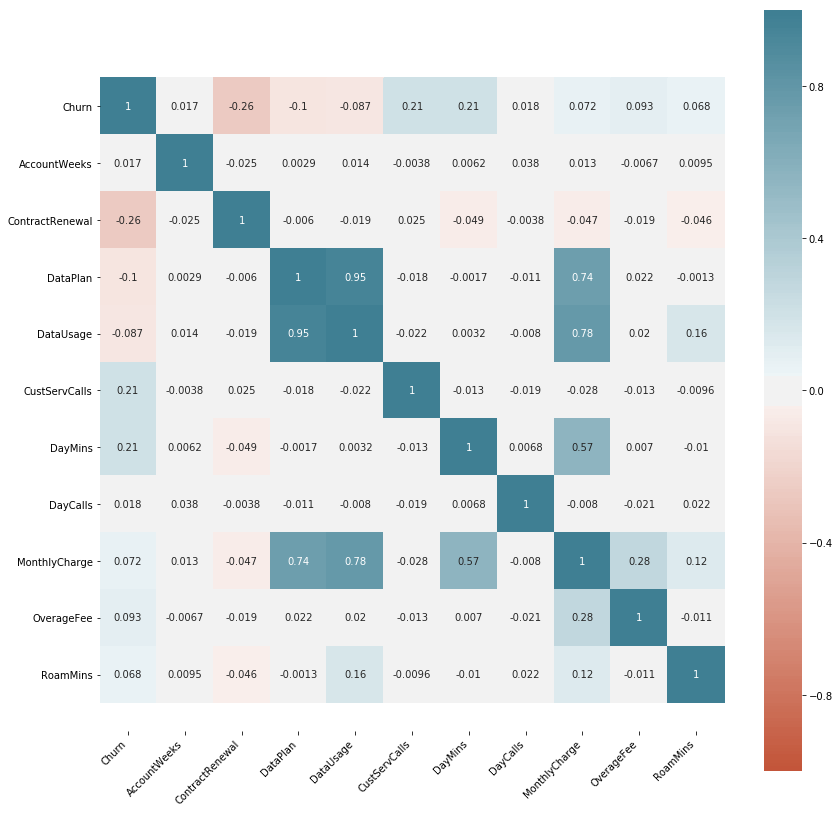

In [13]:
#plot heatmap to find correlation among features
corr = churn.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [14]:
#making the column 'churn' the dependent variable (y)
x = churn.iloc[:,1:11]
y = churn['Churn']
x.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


# Checking for outliers usings z score and box plot

In [15]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x))
z

array([[0.67648946, 0.32758048, 1.6170861 , ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.14906505, 0.32758048, 1.6170861 , ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.9025285 , 0.32758048, 0.61839626, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [1.83505538, 0.32758048, 0.61839626, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [2.08295458, 3.05268496, 0.61839626, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.67974475, 0.32758048, 1.6170861 , ..., 2.66049626, 1.28129669,
        1.24048169]])

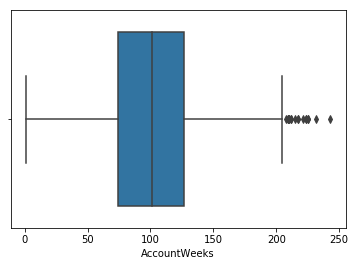

In [16]:
sns.boxplot(churn['AccountWeeks'])

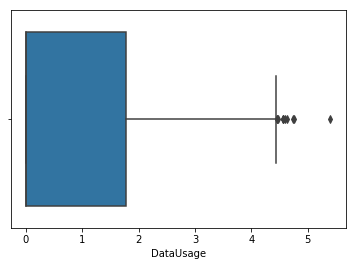

In [17]:
sns.boxplot(churn['DataUsage'])

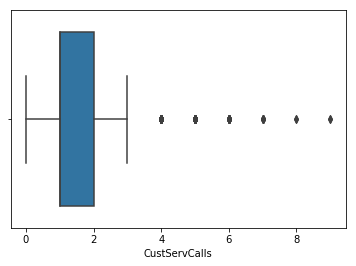

In [18]:
sns.boxplot(churn['CustServCalls'])

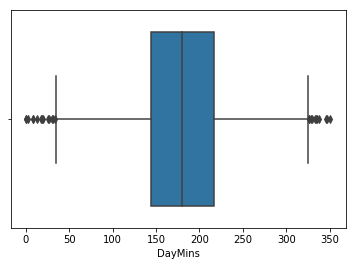

In [19]:
sns.boxplot(churn['DayMins'])

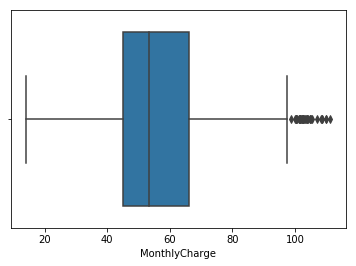

In [20]:
sns.boxplot(churn['MonthlyCharge']) 

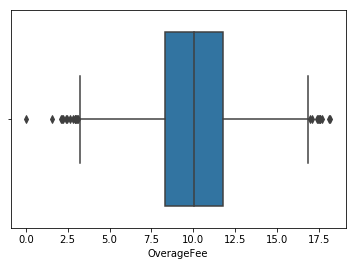

In [21]:
sns.boxplot(churn['OverageFee'])

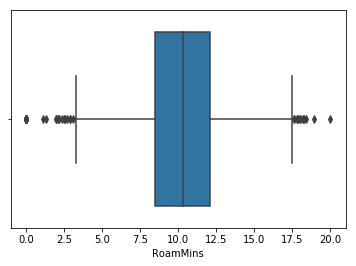

In [22]:
sns.boxplot(churn['RoamMins'])

In [23]:
#checking the number of outliers in the dataset
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

414

In [24]:
#spliting the dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 0)

# Feature Scaling

In [25]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
x_train

array([[-0.84138829,  0.32217788,  1.60471409, ...,  0.38968109,
         0.28799621, -0.22973813],
       [ 0.01041622,  0.32217788,  1.60471409, ...,  0.63316326,
         0.58894545,  0.16202809],
       [-0.24011452, -3.10387541,  1.60471409, ...,  0.13402481,
        -0.35689503, -0.1228928 ],
       ...,
       [-0.19000837, -3.10387541, -0.62316397, ..., -0.88251327,
         0.35443955,  0.30448853],
       [-0.24011452,  0.32217788, -0.62316397, ..., -0.21293729,
         0.73746586, -0.1228928 ],
       [ 0.73695537, -3.10387541, -0.62316397, ...,  0.70012086,
         3.16851039,  2.37016492]])

In [27]:
x_test

array([[-0.21506144, -3.10387541, -0.62316397, ...,  0.15228597,
        -0.79463938, -0.33658346],
       [ 0.28600004,  0.32217788,  1.60471409, ...,  0.21315651,
        -0.86108272, -0.08727768],
       [-0.79128214,  0.32217788, -0.62316397, ..., -0.09728326,
         0.29581307,  0.80310007],
       ...,
       [-0.29022066,  0.32217788, -0.62316397, ..., -1.55208925,
        -0.43506366,  0.73186985],
       [-1.16707825,  0.32217788, -0.62316397, ..., -0.29815605,
         1.21820296, -0.19412302],
       [-0.76622907,  0.32217788,  1.60471409, ...,  0.62707621,
        -0.10284696,  0.01956765]])

# PREDICTING WHETHER A CUSTOMER IS LIKELY TO CHURN OR NOT

# Logistic Regression

In [28]:
LR = LogisticRegression(random_state=0)
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
y_pred = LR.predict(x_test)  #y_pred is y prediction

In [30]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
df_pred_actual =pd.DataFrame({'predicted':y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
405,0,0
118,0,0
710,0,0
499,0,0
2594,1,1
1977,1,1
1892,0,1
1463,0,0
565,0,0
2114,0,0


In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[703,  16],
       [ 92,  23]], dtype=int64)

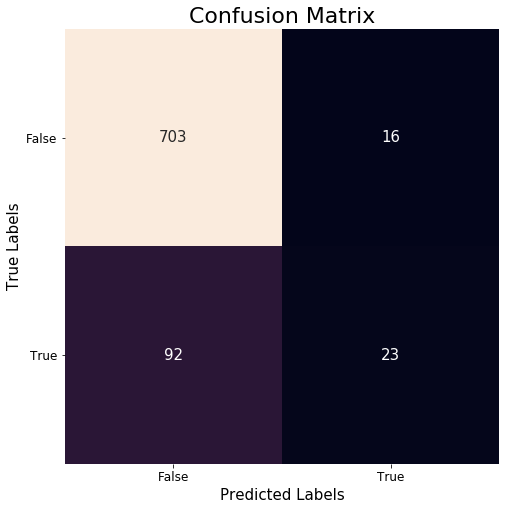

Training Accuracy : 0.8571428571428571
Testing Accuracy : 0.8705035971223022
             precision    recall  f1-score   support

          0       0.88      0.98      0.93       719
          1       0.59      0.20      0.30       115

avg / total       0.84      0.87      0.84       834



In [33]:
#visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True,annot_kws = {'size':15}, fmt='g', cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix',fontsize = 22)
plt.show()

lr_train = LR.score(x_train, y_train)
lr_test = LR.score(x_test, y_test)
print("Training Accuracy :", lr_train)
print("Testing Accuracy :", lr_test)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [34]:
LG= accuracy_score(y_test, y_pred)*100
LG

87.05035971223022

# Random Forest Classifier

In [35]:
RFC = RandomForestClassifier(n_estimators = 400, random_state = 0)
RFC.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
y_pred = RFC.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [37]:
df_pred_actual =pd.DataFrame({'predicted':y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
405,0,0
118,0,0
710,0,0
499,0,0
2594,1,1
1977,1,1
1892,0,1
1463,0,0
565,0,0
2114,0,0


In [38]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[701,  18],
       [ 32,  83]], dtype=int64)

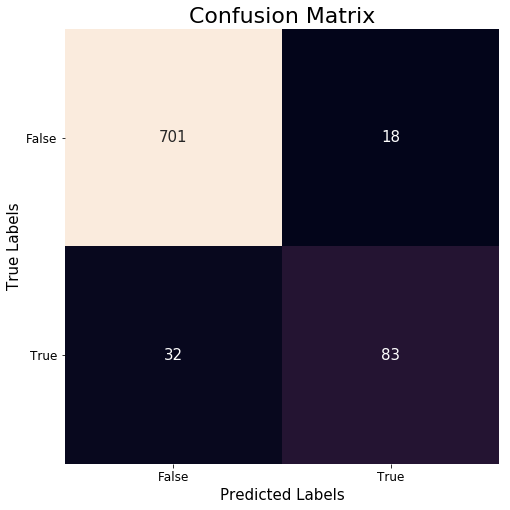

Training Accuracy : 1.0
Testing Accuracy : 0.9400479616306955
             precision    recall  f1-score   support

          0       0.96      0.97      0.97       719
          1       0.82      0.72      0.77       115

avg / total       0.94      0.94      0.94       834



In [39]:
#visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True,annot_kws = {'size':15}, fmt='g', cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix',fontsize = 22)
plt.show()

rfc_train = RFC.score(x_train, y_train)
rfc_test = RFC.score(x_test, y_test)
print("Training Accuracy :", rfc_train)
print("Testing Accuracy :", rfc_test)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)


In [40]:
RF= accuracy_score(y_test, y_pred)*100
RF

94.00479616306954

# Decision Tree Classifier

In [41]:
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [42]:
y_pred = DTC.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [43]:
df_pred_actual =pd.DataFrame({'predicted':y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
405,0,0
118,0,0
710,0,0
499,0,0
2594,1,1
1977,1,1
1892,1,1
1463,0,0
565,0,0
2114,0,0


In [44]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[663,  56],
       [ 36,  79]], dtype=int64)

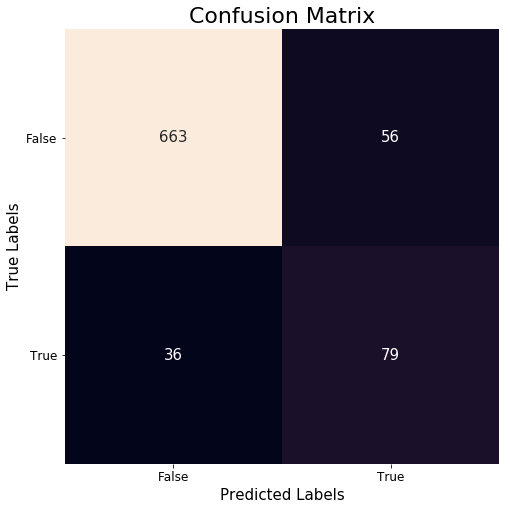

Training Accuracy : 1.0
Testing Accuracy : 0.8896882494004796
             precision    recall  f1-score   support

          0       0.95      0.92      0.94       719
          1       0.59      0.69      0.63       115

avg / total       0.90      0.89      0.89       834



In [45]:
#visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True,annot_kws = {'size':15}, fmt='g', cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix',fontsize = 22)
plt.show()

dtc_train = DTC.score(x_train, y_train)
dtc_test = DTC.score(x_test, y_test)
print("Training Accuracy :", dtc_train)
print("Testing Accuracy :", dtc_test)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [46]:
DT= accuracy_score(y_test, y_pred)*100
DT

88.96882494004797

# KNeighbors classifier

In [47]:
KNC = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNC.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
y_pred = KNC.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [49]:
df_pred_actual =pd.DataFrame({'predicted':y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
405,0,0
118,0,0
710,0,0
499,0,0
2594,0,1
1977,1,1
1892,0,1
1463,0,0
565,0,0
2114,0,0


In [50]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[705,  14],
       [ 63,  52]], dtype=int64)

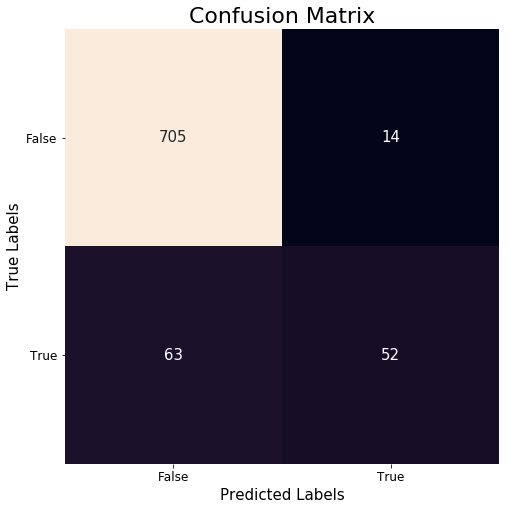

Training Accuracy : 0.9243697478991597
Testing Accuracy : 0.907673860911271
             precision    recall  f1-score   support

          0       0.92      0.98      0.95       719
          1       0.79      0.45      0.57       115

avg / total       0.90      0.91      0.90       834



In [51]:
#visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True,annot_kws = {'size':15}, fmt='g', cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix',fontsize = 22)
plt.show()

knc_train = KNC.score(x_train, y_train)
knc_test = KNC.score(x_test, y_test)
print("Training Accuracy :", knc_train)
print("Testing Accuracy :", knc_test)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [52]:
KN= accuracy_score(y_test, y_pred)*100
KN

90.7673860911271

# GaussianNB

In [53]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB(priors=None)

In [54]:
y_pred = GNB.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [55]:
df_pred_actual =pd.DataFrame({'predicted':y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
405,1,0
118,0,0
710,0,0
499,0,0
2594,1,1
1977,1,1
1892,1,1
1463,0,0
565,0,0
2114,0,0


In [56]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[656,  63],
       [ 65,  50]], dtype=int64)

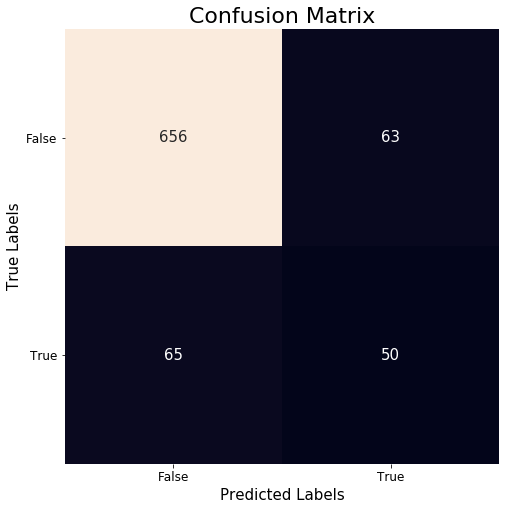

Training Accuracy : 0.851140456182473
Testing Accuracy : 0.8465227817745803
             precision    recall  f1-score   support

          0       0.91      0.91      0.91       719
          1       0.44      0.43      0.44       115

avg / total       0.85      0.85      0.85       834



In [57]:
#visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True,annot_kws = {'size':15}, fmt='g', cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix',fontsize = 22)
plt.show()

gnb_train = GNB.score(x_train, y_train)
gnb_test = GNB.score(x_test, y_test)
print("Training Accuracy :", gnb_train)
print("Testing Accuracy :", gnb_test)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [58]:
GB= accuracy_score(y_test, y_pred)*100
GB

84.65227817745803

# SVC

In [59]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [61]:
df_pred_actual =pd.DataFrame({'predicted':y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
405,0,0
118,0,0
710,0,0
499,0,0
2594,1,1
1977,1,1
1892,0,1
1463,0,0
565,0,0
2114,0,0


In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[707,  12],
       [ 55,  60]], dtype=int64)

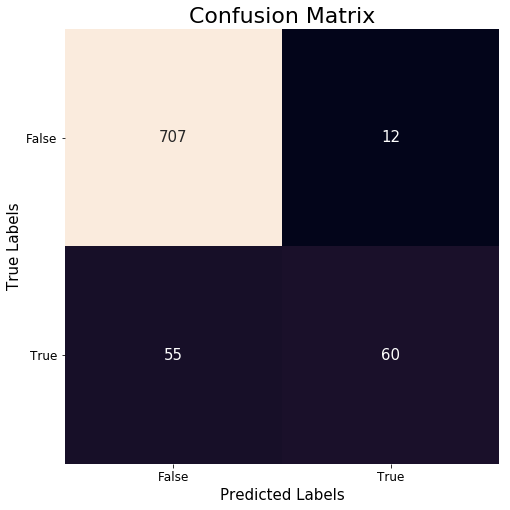

Training Accuracy : 0.9319727891156463
Testing Accuracy : 0.919664268585132
             precision    recall  f1-score   support

          0       0.93      0.98      0.95       719
          1       0.83      0.52      0.64       115

avg / total       0.91      0.92      0.91       834



In [63]:
#visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True,annot_kws = {'size':15}, fmt='g', cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix',fontsize = 22)
plt.show()

svc_train = classifier.score(x_train, y_train)
svc_test = classifier.score(x_test, y_test)
print("Training Accuracy :", svc_train)
print("Testing Accuracy :", svc_test)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [64]:
svc= accuracy_score(y_test, y_pred)*100
svc

91.96642685851319

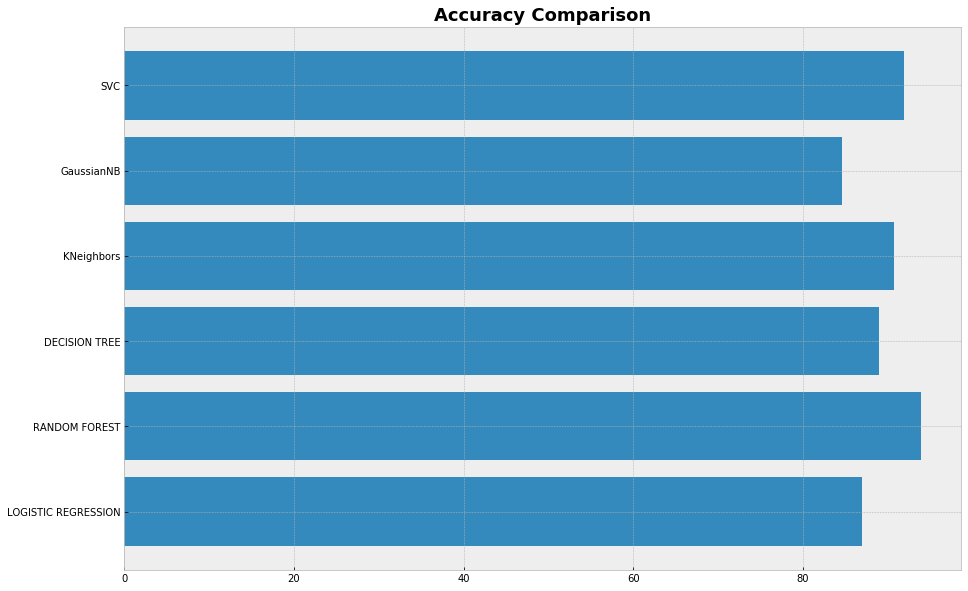

In [65]:
names=[]
names.append('LOGISTIC REGRESSION')
names.append('RANDOM FOREST')
names.append('DECISION TREE')
names.append('KNeighbors')
names.append('GaussianNB')
names.append('SVC')
results=[]
results.append(LG)
results.append(RF)
results.append(DT)
results.append(KN)
results.append(GB)
results.append(svc)

plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('bmh')
plt.barh(names,results)
plt.title("Accuracy Comparison",  weight='bold', size=18)
sns.set_context('poster') 
plt.Xlabel=results
plt.ylabel=names 
plt.show()

In [66]:
table = pd.DataFrame([['LOGISTICREGRESSION', lr_train, lr_test],
                ['RANDOMFOREST', rfc_train, rfc_test],
                ['DECISIONTREE', dtc_train, dtc_test],
                ['KNEIGHBOUR', knc_train, knc_test],
                ['GAUSSIANNB', gnb_train, gnb_test],
                ['SVC', svc_train, svc_test]], columns=["Model Name", "Train Accuracy mean", "Test Accuracy Mean"])
                
display(table.style.background_gradient(cmap='summer_r'))              

,Model Name,Train Accuracy mean,Test Accuracy Mean
0,LOGISTICREGRESSION,0.857143,0.870504
1,RANDOMFOREST,1,0.940048
2,DECISIONTREE,1,0.889688
3,KNEIGHBOUR,0.92437,0.907674
4,GAUSSIANNB,0.85114,0.846523
5,SVC,0.931973,0.919664
